In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
# output metrics, and plot predicted vs original results
def get_scores(model, Xtest, ytest):
    y_pred = model.predict(Xtest)
    return (y_pred, 
            np.sqrt(mean_squared_error(ytest, y_pred)), 
            r2_score(ytest, y_pred),
            model.__class__.__name__)

In [3]:
def metrics_plot(y1, y2):
    plt.figure(figsize=(6,6))
    plt.plot(y1, y2, 'bo')
    plt.plot([100,1500], [100,1500], color='black', linewidth=2.0, linestyle='-')
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.xlim((100,1500))
    plt.ylim((100,1500))
        
    my_x_ticks = np.arange(100,1600,200)
    my_y_ticks = np.arange(100, 1600, 200)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)
    plt.axis('scaled')
    
    plt.show()

In [4]:
# read date from csv file
data = pd.read_csv('fatigue_data.csv', index_col='Sl. No.')

# delete extra columns
xx = data.drop(data.columns[17:20], axis=1)
xx.head()

,NT,THT,THt2,THQCr,CT,Ct3,DT,Dt4,QmT,TT,Tt5,TCr,C,Ni,Cr,Mo,Fatigue
Sl. No.,,,,,,,,,,,,,,,,,
1,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.01,0.02,0.0,232
2,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.25,0.08,0.12,0.0,235
3,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.02,0.03,0.0,235
4,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.01,0.02,0.0,241
5,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.22,0.01,0.02,0.0,225


In [5]:
# set X as columns C, Ni, Cr and Mo (No.16-19)
X = data.drop(data.columns[16:20], axis=1) 
# set y as 'Fatigue' column (No.17)
y = data['Fatigue']

# splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [35]:
#models 
#simple linear regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr, rmse_lr, r2_lr, lr_name = get_scores(lr, X_test, y_test)

#ridge regression
ridge = Ridge(alpha=0.08, random_state=0).fit(X_train, y_train)
y_pred_rg, rmse_rg, r2_rg, rg_name = get_scores(ridge, X_test, y_test)

#lasso regression
lasso = Lasso(alpha=0.5,random_state=0).fit(X_train, y_train)
y_pred_ls, rmse_ls, r2_ls, ls_name = get_scores(lasso, X_test, y_test)

#elasticnet regression
en = ElasticNet(alpha=0.03,random_state=0).fit(X_train, y_train)
y_pred_en, rmse_en, r2_en, en_name = get_scores(en, X_test, y_test)


print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(lr_name, rmse_lr, r2_lr))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(rg_name, rmse_rg, r2_rg))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(ls_name, rmse_ls, r2_ls))
print("{0} model\n RMSE = {1: .5f}, R2 = {2: .5f}\n".format(en_name, rmse_en, r2_en))


LinearRegression model
 RMSE =  35.25735, R2 =  0.96993

Ridge model
 RMSE =  34.90457, R2 =  0.97053

Lasso model
 RMSE =  37.70002, R2 =  0.96562

ElasticNet model
 RMSE =  37.62806, R2 =  0.96575



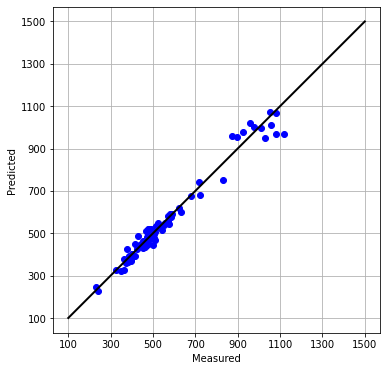

In [36]:
metrics_plot(y_test, y_pred_rg)

In [37]:
def plot_coef(coeffs):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(X.columns)), coeffs)
    plt.axhline(0, color='r', linestyle='solid')
    plt.xticks(range(len(X.columns)), X.columns,rotation=50)
    plt.title("Coefficients for Multiple Linear Regression")
    plt.ylabel("coefficients")
    plt.xlabel("features")
    plt.show()

In [38]:
#coefficient analysis
#simple linear regression coefficients
lr_coeffs = lr.coef_

#ridge regression coefficients
ridge_coeffs = ridge.coef_

#lasso regression coefficients
lasso_coeffs = lasso.coef_
lasso_coeffs

array([ -2.99472665,   0.30660447, -14.54331702,  -6.72266744,
         0.69553253,   0.15355543,  -0.10549339,  -1.24855476,
        -0.50030013,  -1.06432157,   3.58812217,  33.19166262,
         0.        ,  36.18073136,  78.92317289,   0.        ])

In [39]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'without_regularization': lr_coeffs,
                                 'Ridge': ridge_coeffs,
                                 'Lasso':  lasso_coeffs},
                                  index=X.columns)
comparing_models

,without_regularization,Ridge,Lasso
NT,-0.587588,-1.771028,-2.994727
THT,1.802568,2.028363,0.306604
THt2,-4.749921,-5.658557,-14.543317
THQCr,-3.903455,-5.302380,-6.722667
CT,2.300406,2.532153,0.695533
Ct3,0.127114,0.126255,0.153555
DT,-0.107628,-0.042152,-0.105493
Dt4,-0.827763,-0.809733,-1.248555
QmT,-0.428041,-0.449105,-0.500300
TT,-0.980099,-0.994492,-1.064322


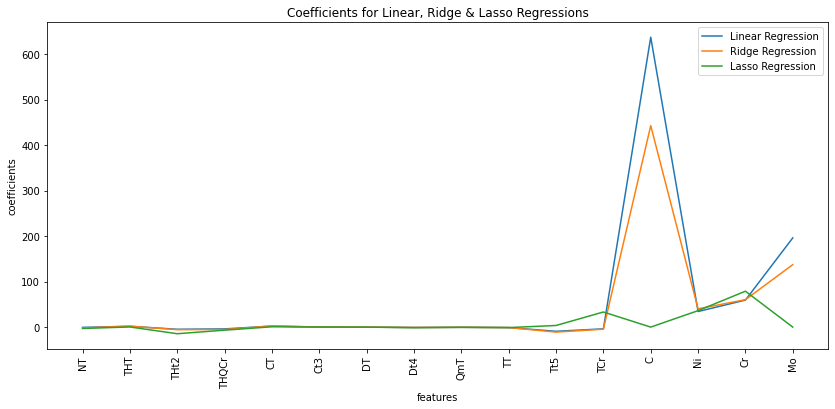

In [40]:
y1 = comparing_models['without_regularization']
y2 = comparing_models['Ridge']
y3 = comparing_models['Lasso']

xx = np.arange(1, 17, 1)
xx

plt.figure(figsize=(14, 6))
plt.plot(xx, y1, label="Linear Regression")
plt.plot(xx, y2, label="Ridge Regression")
plt.plot(xx, y3, label="Lasso Regression")

plt.xticks(xx, X.columns, rotation=90)
#plt.vlines(xx, 0, y1, linestyle="dashed")

#plt.axhline(0, color='r', linestyle='solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.legend()
plt.show()